<a href="https://colab.research.google.com/github/faisaladisoe/image-processing-lab/blob/master/Lab%205/source%20code/Lab5_1906293184_MuhammadFaisalAdiSoesatyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References



1.   https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
2.   List item



# Import Libraries

In [ ]:
import cv2 as cv
import numpy as np
from numpy import array, zeros
from matplotlib import pyplot as plt
from skimage.morphology import disk, ball
from skimage import color, io, filters, util

# Thresholding

## Importing Image

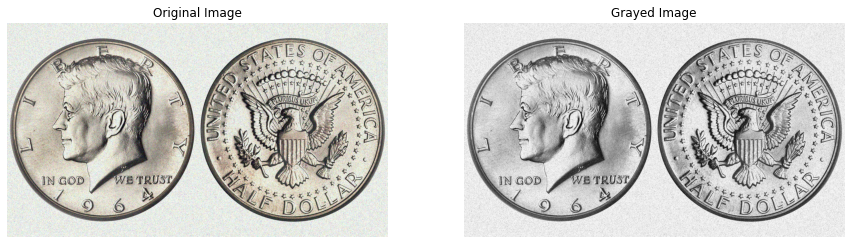

In [ ]:
coin_image = io.imread('./images/noisy_coin.jpeg')
grayed = color.rgb2gray(coin_image)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1); plt.imshow(coin_image, cmap='gray')
plt.title('Original Image'); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(grayed, cmap='gray')
plt.title('Grayed Image'); plt.axis('off')
plt.show()

## Simple Global Thresholding

### Noise Reduction

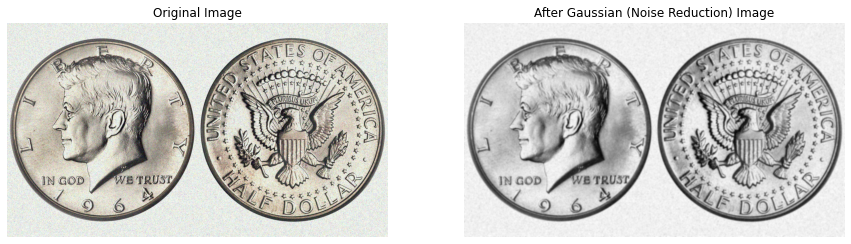

In [ ]:
gaussian = util.img_as_ubyte(filters.gaussian(grayed, sigma=4))

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1); plt.imshow(coin_image, 'gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(gaussian, cmap='gray')
plt.title('After Gaussian (Noise Reduction) Image')
plt.axis('off')
plt.show()

### Edge Detection & Thresholding

Text(0.5, 1.0, 'Sobel Histogram')

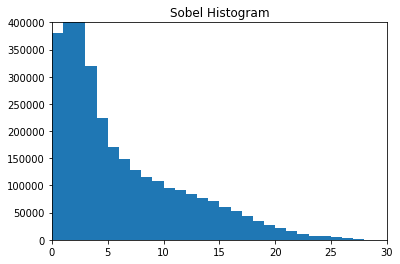

In [217]:
sobel = util.img_as_ubyte(filters.sobel(gaussian))
_, thresh = cv.threshold(sobel, 7, 255, cv.THRESH_BINARY)

plt.subplot(1,1,1); plt.hist(sobel.flatten(), 256, range=(0,256))
plt.xlim([0, 30]); plt.ylim([0, .4e6]); plt.title('Sobel Histogram')

### Plotting

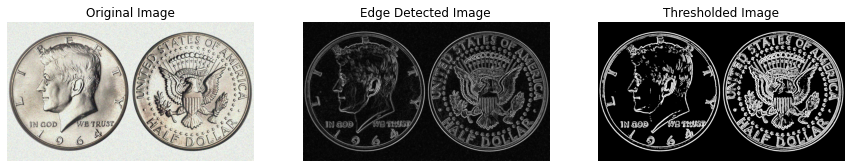

In [218]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1); plt.imshow(coin_image, 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2); plt.imshow(sobel, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')

plt.subplot(1, 3, 3); plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.show()

## Otsu's Thresholding with Histogram 

### Thresholding

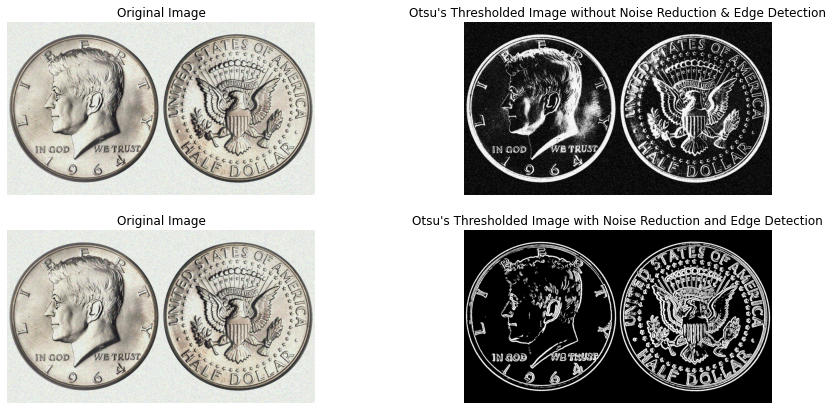

In [219]:
otsus_G = [util.img_as_ubyte(grayed), sobel]
otsus_T_g = filters.threshold_otsu(otsus_G[0])
otsus_T_s = filters.threshold_otsu(otsus_G[1])
otsus_S_g = util.img_as_float(otsus_G[0] > otsus_T_g)
otsus_S_s = util.img_as_float(otsus_G[1] > otsus_T_s)

plt.figure(figsize=(15,7))
plt.subplot(2,2,1); plt.imshow(coin_image)
plt.title('Original Image'); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(1-otsus_S_g, cmap='gray')
plt.title("Otsu's Thresholded Image without Noise Reduction & Edge Detection"); plt.axis("off")
plt.subplot(2,2,3); plt.imshow(coin_image)
plt.title('Original Image'); plt.axis("off")
plt.subplot(2,2,4); plt.imshow(otsus_S_s, cmap='gray')
plt.title("Otsu's Thresholded Image with Noise Reduction and Edge Detection"); plt.axis("off")
plt.show()

### Histogram

Text(0.5, 1.0, "Otsu's with NR and ED")

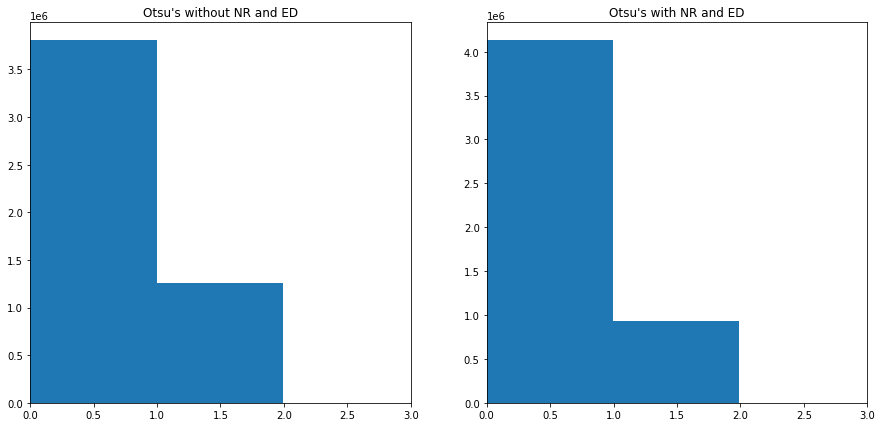

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist((1-otsus_S_g).flatten(), 256, range=(0,255)); plt.xlim([0, 3])
plt.title('Otsu\'s without NR and ED')
plt.subplot(1,2,2)
plt.hist(otsus_S_s.flatten(), 256, range=(0,255)); plt.xlim([0, 3])
plt.title('Otsu\'s with NR and ED')

## Explanation about Simple Global vs Otsu's Thresholding

Pada penjelasan terkait perbedaan hasil simple global dengan otsu's akan dipecah menjadi dua bagian, apple-to-apple (keduanya sama sama diterapkan preprocessing seperti noise reduction dan edge detection) serta non-apple-to-apple (hanya simple global yang diterapkan preprocessing)


*   apple-to-apple: \
Pada hasil ini secara sekilas menghasilkan tampilan citra yang kurang lebih sama dengan nilai T pada simple global adalah 7. Namun hasil akan terlihat beda apabila nilai dari T adalah 10. Dari kedua fenomena ini dapat disimpulkan bahwa hasil pada simple global sangat terikat pada threshold yang ditetapkan oleh researcher. Apabila proses penarikan kesimpulan terhadap hasil eksplorasi histogram dari proses sobel kurang tepat, maka penentuan T pada saat thresholding akan kurang tepat pula. Berbeda dengan otsu's yang memberi researcher kemudahan untuk tidak perlu menentukan nilai threshold secara eksplisit, mengingat prinsip kerja utama dari otsu's adalah meminimalkan bobot pada variansi dalam kelas yang sama.
*   non-apple-to-apple: \
Pada hasil ini simple global diterapkan proses preprocessing seperti noise reduction serta edge detection sedangkan pada otsu's tidak diterapkan proses tersebut. Hasil dari otsu's terlihat cukup berbeda dari simple global. Pada hasil otsu's thresholding, gambar Kennedy (head) serta US president's seal (tail) terlihat maju kedepan sama seperti pada gambar originalnya sedangkan pada simple global hanya tersisa edgenya. Hal ini dapat terjadi karena pada otsu's tidak diterapkan edge detection, sehingga gambar yang diproses ke dalam otsu's thresholding langsung versi grayscale dari original image.

Apabila analisis dilihat pada sisi histogramnya, baik dengan preprocessing maupun tidak, keduanya sama-sama memiliki intensitas maksimum < 2. Namun terdapat perbedaan pada tinggi histogramnya dan pada intensitas 1. Pada otsu's dengan preprocessing nilai dari intensitas 1 adalah 1e6 sedangkan pada otsu's tanpa preprocessing adalah sekitar 1.25e6.



## Which method is the most optimum for this case

Berdasarkan hasil percobaan yang saya lakukan di atas, metode yang paling optimum untuk kasus ini adalah otsu's thresholding method. Hal ini karena pada otsu's method tidak memerlukan input thresholding level secara eksplisit dari researcher. Researcher cukup lakukan preprocessing pada image seperti noise reduction, edge detection atau apabila perlu contrast stretching/histogram equalisation kemudian hasil dari preprocessing langsung bisa diterapkan pada proses otsu's thresholding. Sedangkan pada simple global membutuhkan input thresholding level yang tepat. Apabila penentuan thresholding level tidak tepat mengakibatkan hasil dari thresholding tersebut kurang optimum atau bahkan gambar menjadi full-black atau full-white. Penentuan thresholding level yang tepat memerlukan tampilan plot histogram yang tepat, sehingga researcher dapat melakukan perkiraan posisi thresholding level dengan lebih baik.

# Clustering

## Importing Image

## Segmentation using SLIC

## Visualisation using median

## Correlation between \# of segment with segmentation result

## Image Conversion to LAB color space

## Reconvert to RGB color space

## Generalize \# of segment after reconvert